An exact cover problem is an NP-complete problem in which each element of a given set must be covered exactly once by a subset from a given collection of its subsets. Formally:

Given a set $U$ and a family of subsets $S=\{S_1,\dots,S_n\}\subseteq\mathcal{P}(U)$, find a subfamily $S'\subseteq S$ such that: 
$$
i) \hspace{4pt} \forall \hspace{2pt} S_i, S_j \in S', \hspace{4pt} S_i\cap S_j = \emptyset.
$$
$$
ii) \bigcup_{S_i \in S'} S_i = U
$$

For example, consider the problem:
$$
    U = \{ \textbf{A}, \textbf{B}, \textbf{C} \} 
$$
$$
    S = \bigl\{ S_0 = \{\textbf{A}\}, S_1 = \{\textbf{B}\}, S_2 = \{\textbf{C}\}, S_3 = \{\textbf{A},\textbf{C}\}, S_4 = \{\textbf{A},\textbf{B}\}\bigr\}
$$

Notice that it has three solutions:
$$
    S' =  \bigl\{ S_0 = \{\textbf{A}\}, S_1 = \{\textbf{B}\}, S_2 = \{\textbf{C}\}\}\bigr\}, \\
    S'' =  \bigl\{ S_2 = \{\textbf{C}\}, S_4 = \{\textbf{A},\textbf{B}\}\bigr\}, \\
    S''' =  \bigl\{ S_1 = \{\textbf{B}\}, S_3 = \{\textbf{A},\textbf{C}\}\bigr\}. \\
$$

We can find such solutions using a quantum algorithm [Jiang,Wang]:

In [1]:
# Import the necessary library
from sudoku_nisq.quantum import ExactCoverQuantumSolver

Encode the problem and introduce it into the quantum solver:

In [2]:
# Universe
U = ['A','B','C']
# Subsets
S = {'S_0': [U[0]], 'S_1': [U[1]], 'S_2': [U[2]], 'S_3': [U[0], U[2]], 'S_4': [U[0], U[1]]}

solver = ExactCoverQuantumSolver(universe=U,subsets=S,num_solutions=3)

Initialize the quantum circuit, find its resources and draw the circuit:

In [3]:
solver.get_circuit()

# Returns pytket circuit object

[H S[0]; H S[1]; H S[2]; H S[3]; H S[4]; X anc; CnX S[0], U_0[0], U_0[1], U_0[2]; CnX S[1], U_1[0], U_1[1], U_1[2]; CnX S[2], U_2[0], U_2[1], U_2[2]; H anc; CnX S[0], U_0[0], U_0[1]; CnX S[1], U_1[0], U_1[1]; CnX S[2], U_2[0], U_2[1]; CnX S[0], U_0[0]; CnX S[1], U_1[0]; CnX S[2], U_2[0]; CnX S[3], U_2[0], U_2[1], U_2[2]; CnX S[4], U_1[0], U_1[1], U_1[2]; CnX S[3], U_2[0], U_2[1]; CnX S[4], U_1[0], U_1[1]; X U_1[2]; X U_2[2]; CnX S[3], U_2[0]; CnX S[4], U_1[0]; X U_1[1]; X U_2[1]; CnX S[3], U_0[0], U_0[1], U_0[2]; CnX S[3], U_0[0], U_0[1]; CnX S[3], U_0[0]; CnX S[4], U_0[0], U_0[1], U_0[2]; CnX S[4], U_0[0], U_0[1]; X U_0[2]; CnX S[4], U_0[0]; X U_0[1]; CnX U_0[0], U_0[1], U_0[2], U_1[0], U_1[1], U_1[2], U_2[0], U_2[1], U_2[2], anc; CnX S[4], U_0[0]; X U_0[1]; X U_0[2]; X U_1[1]; X U_1[2]; X U_2[1]; X U_2[2]; CnX S[4], U_0[0], U_0[1]; CnX S[4], U_0[0], U_0[1], U_0[2]; CnX S[3], U_0[0]; CnX S[4], U_1[0]; CnX S[3], U_0[0], U_0[1]; CnX S[4], U_1[0], U_1[1]; CnX S[3], U_0[0], U_0[1], U_0[2]

In [4]:
solver.find_resources()

# Number of qubits || Number of MCX gates || Total number of gates

(15, 110, 159)

In [5]:
solver.draw_circuit()

Since the problem size is small, we can simulate it using IBM's Aer simulator

In [6]:
solver.aer_simulation(shots=2000)

Counter({(np.uint8(1),
          np.uint8(1),
          np.uint8(1),
          np.uint8(0),
          np.uint8(0)): np.int64(698),
         (np.uint8(0),
          np.uint8(1),
          np.uint8(0),
          np.uint8(1),
          np.uint8(0)): np.int64(653),
         (np.uint8(0),
          np.uint8(0),
          np.uint8(1),
          np.uint8(0),
          np.uint8(1)): np.int64(649)})

and get the counts plot:

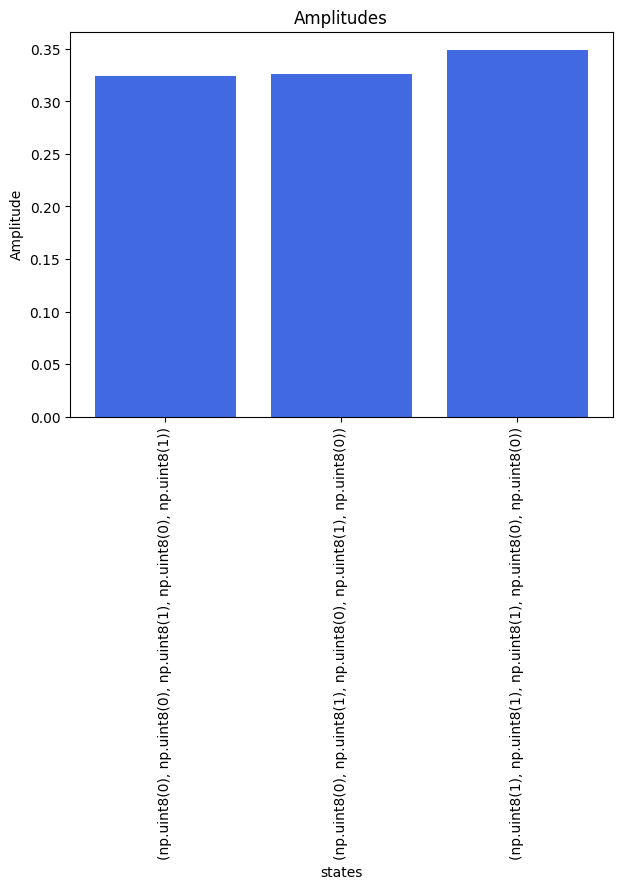

In [8]:
solver.counts_plot()

Notice that the results indicate the measurements of the qubits corresponding to the subsets $S_0,S_1,S_2,S_3,S_4$. All combination of subsets are processed in superposition, then the oracle marks the states of the subsets with unique assignments and the diffuser amplifies the probabilities of the marked states. [Jiang,Wang]

So in this case we got the strings $00101$, $01010$ and $11100$, which correspond to sets $S_2, S_4$; $S_1, S_3$ and $S_0, S_1, S_2$, which are the correct solutions as previously noted.

Ref:
[Jiang,Wang] J. -R. Jiang and Y. -J. Wang, "Quantum Circuit Based on Grover’s Algorithm to Solve Exact Cover Problem," 2023 VTS Asia Pacific Wireless Communications Symposium (APWCS), Tainan city, Taiwan, 2023, pp. 1-5, doi: 10.1109/APWCS60142.2023.10234054.